#Emotion Recognition in the Wild via Convolutional Neural Networks and Mapped Binary Patterns - Demo

The following demo demonstrates our method for emotion recognition from facial images, as described in the 

###Gil Levi and Tal Hassner, Emotion Recognition in the Wild via Convolutional Neural Networks and Mapped Binary Patterns, Proc. ACM International Conference on Multimodal Interaction (ICMI), Seattle, Nov. 2015 

If you find our code usefull, please consider adding a suitable reference to our paper in your work. 


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


caffe_root = '~/caffe/' 
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


DEMO_DIR = '.'

categories = [ 'Angry' , 'Disgust' , 'Fear' , 'Happy'  , 'Neutral' ,  'Sad' , 'Surprise']

In [2]:
def showimage(im):
    if im.ndim == 3:
        im = im[:, :, ::-1]
    plt.set_cmap('jet')
    plt.imshow(im,vmin=0, vmax=0.2)
    

def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    showimage(data)

# RGB
###Defining the network and running prediction

In [3]:
cur_net_dir = 'VGG_S_rgb'

mean_filename=os.path.join(DEMO_DIR,cur_net_dir,'mean.binaryproto')
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

net_pretrained = os.path.join(DEMO_DIR,cur_net_dir,'EmotiW_VGG_S.caffemodel')
net_model_file = os.path.join(DEMO_DIR,cur_net_dir,'deploy.prototxt')
VGG_S_Net = caffe.Classifier(net_model_file, net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

input_image = caffe.io.load_image(os.path.join(DEMO_DIR,cur_net_dir,'demo_image.png'))
prediction = VGG_S_Net.predict([input_image],oversample=False)
print 'predicted category is {0}'.format(categories[prediction.argmax()])

predicted category is Angry


## RGB - Input image

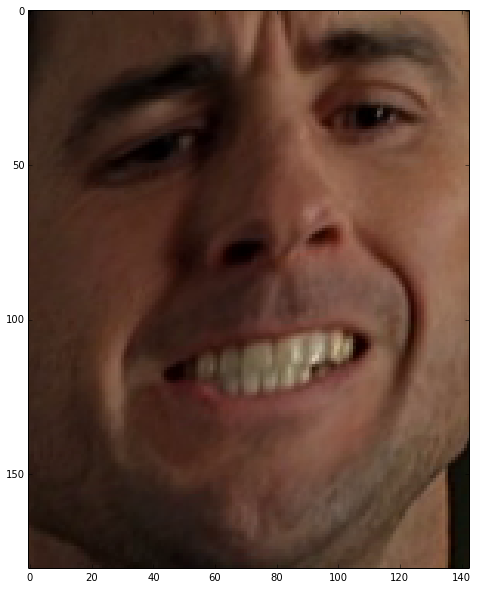

In [4]:
_ = plt.imshow(input_image)

## RGB - The first conv layer filters

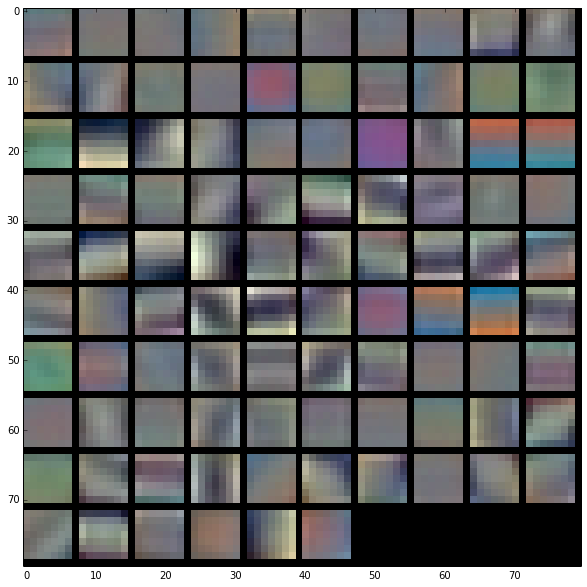

In [5]:
filters = VGG_S_Net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

## RGB - The first Conv layer output (rectified responses of the filters above)

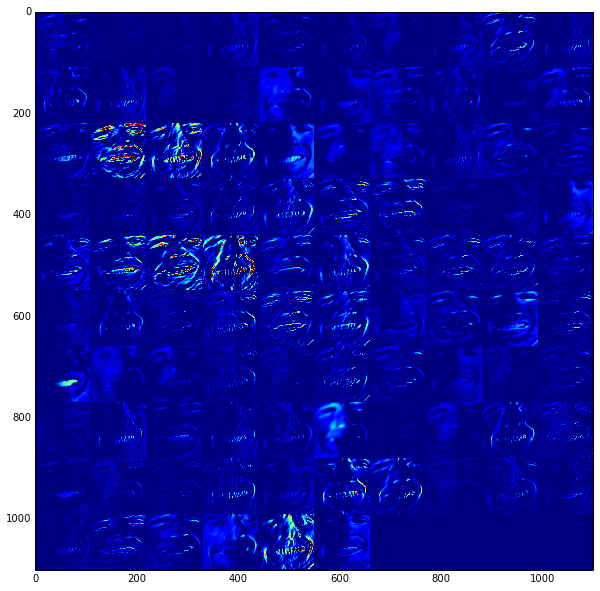

In [6]:
feat = VGG_S_Net.blobs['conv1'].data[0]
vis_square(feat)

# LBP
###Defining the network and running prediction

In [7]:
cur_net_dir = 'VGG_S_lbp'

mean_filename=os.path.join(DEMO_DIR,cur_net_dir,'mean.binaryproto')
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

# mean = None #Only for better visualization

net_pretrained = os.path.join(DEMO_DIR,cur_net_dir,'EmotiW_VGG_S.caffemodel')
net_model_file = os.path.join(DEMO_DIR,cur_net_dir,'deploy.prototxt')
VGG_S_Net = caffe.Classifier(net_model_file, net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

input_image = caffe.io.load_image(os.path.join(DEMO_DIR,cur_net_dir,'demo_image.png'))
prediction = VGG_S_Net.predict([input_image],oversample=False)
print 'predicted category is {0}'.format(categories[prediction.argmax()])

predicted category is Angry


## LBP - Input image

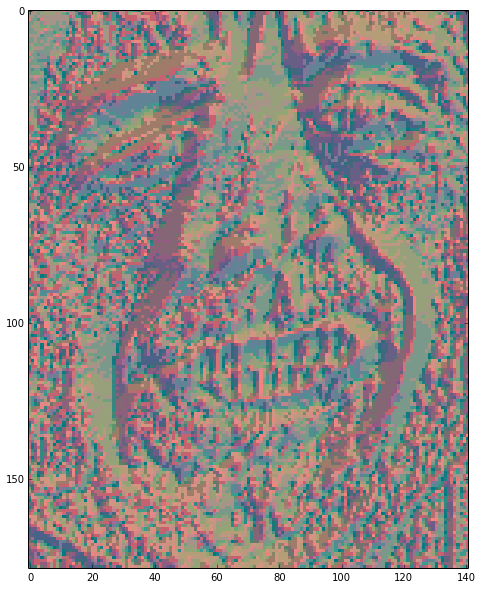

In [8]:
_ = plt.imshow(input_image)

## LBP - The first conv layer filters

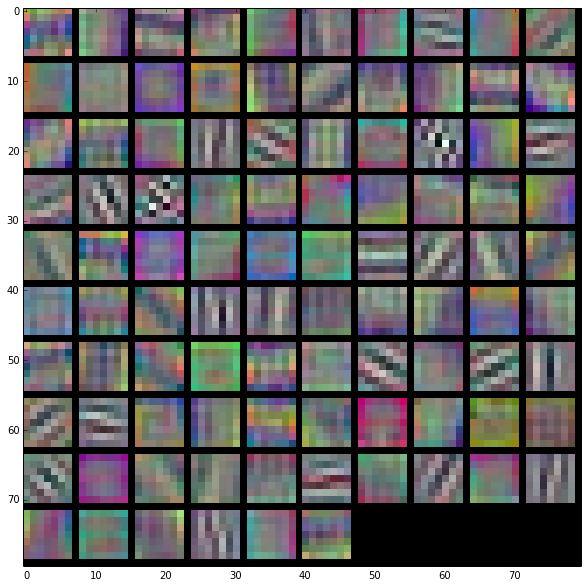

In [9]:
filters = VGG_S_Net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

## LBP- The first Conv layer output (rectified responses of the filters above)

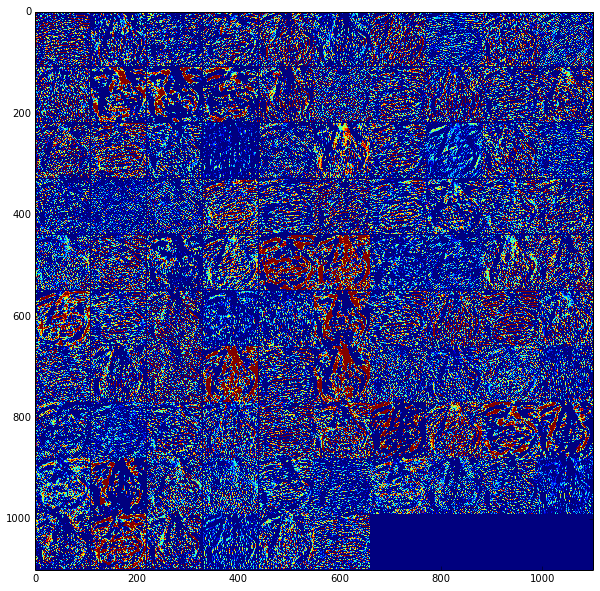

In [10]:
feat = VGG_S_Net.blobs['conv1'].data[0]
vis_square(feat)

# Cyclic - LBP
###Defining the network and running prediction

In [11]:
cur_net_dir = 'VGG_S_cyclic_lbp'

mean_filename=os.path.join(DEMO_DIR,cur_net_dir,'mean.binaryproto')
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

# mean = None #Only for better visualization

net_pretrained = os.path.join(DEMO_DIR,cur_net_dir,'EmotiW_VGG_S.caffemodel')
net_model_file = os.path.join(DEMO_DIR,cur_net_dir,'deploy.prototxt')
VGG_S_Net = caffe.Classifier(net_model_file, net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

input_image = caffe.io.load_image(os.path.join(DEMO_DIR,cur_net_dir,'demo_image.png'))
prediction = VGG_S_Net.predict([input_image],oversample=False)
print 'predicted category is {0}'.format(categories[prediction.argmax()])

predicted category is Fear


## Cyclic LBP - Input image

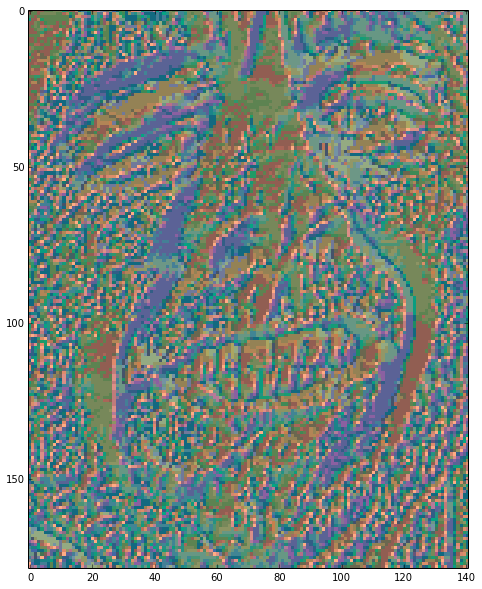

In [12]:
_ = plt.imshow(input_image)

## Cyclic LBP - The first conv layer filters

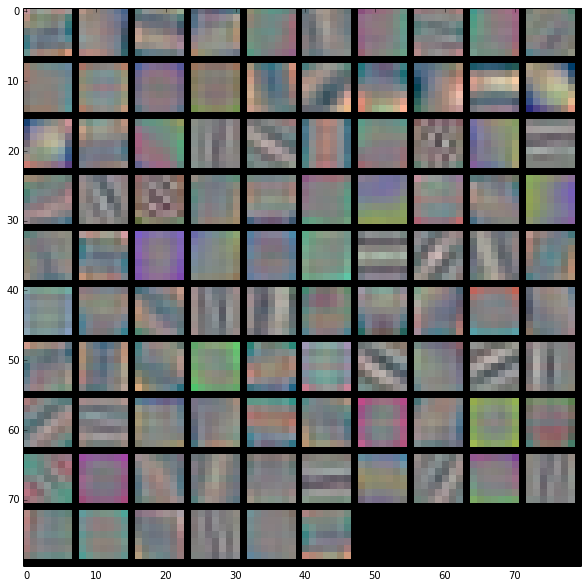

In [13]:
filters = VGG_S_Net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

## Cyclic LBP- The first Conv layer output (rectified responses of the filters above)

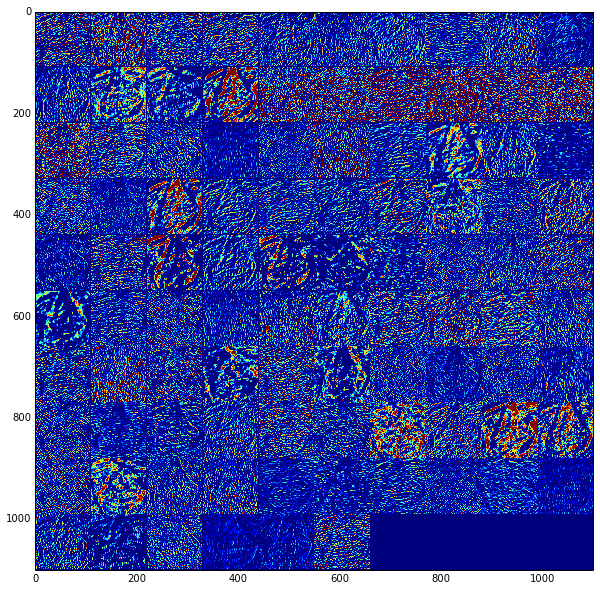

In [14]:
feat = VGG_S_Net.blobs['conv1'].data[0]
vis_square(feat)

# Cyclic - LBP - 5
###Defining the network and running prediction

In [15]:
cur_net_dir = 'VGG_S_cyclic_lbp_5'

mean_filename=os.path.join(DEMO_DIR,cur_net_dir,'mean.binaryproto')
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

# mean = None #Only for better visualization

net_pretrained = os.path.join(DEMO_DIR,cur_net_dir,'EmotiW_VGG_S.caffemodel')
net_model_file = os.path.join(DEMO_DIR,cur_net_dir,'deploy.prototxt')
VGG_S_Net = caffe.Classifier(net_model_file, net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

input_image = caffe.io.load_image(os.path.join(DEMO_DIR,cur_net_dir,'demo_image.png'))
prediction = VGG_S_Net.predict([input_image],oversample=False)
print 'predicted category is {0}'.format(categories[prediction.argmax()])

predicted category is Angry


## Cyclic LBP 5 - Input image

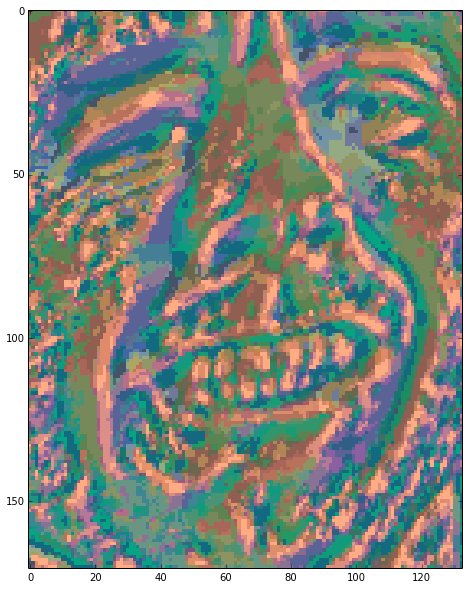

In [16]:
_ = plt.imshow(input_image)

## Cyclic LBP 5 - The first conv layer filters

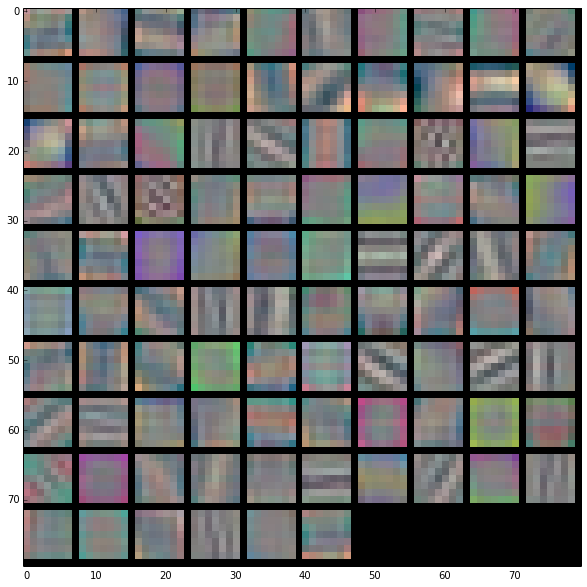

In [17]:
filters = VGG_S_Net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

## Cyclic LBP 5 - The first Conv layer output (rectified responses of the filters above)

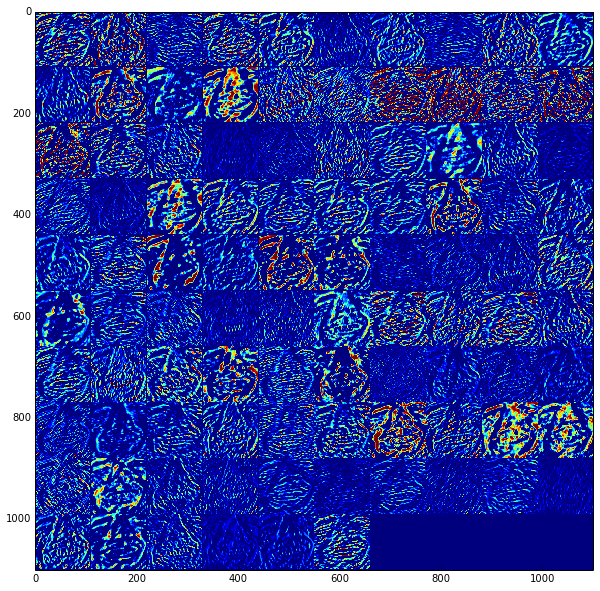

In [18]:
feat = VGG_S_Net.blobs['conv1'].data[0]
vis_square(feat)

# Cyclic - LBP - 10
###Defining the network and running prediction

In [19]:
cur_net_dir = 'VGG_S_cyclic_lbp_10'

mean_filename=os.path.join(DEMO_DIR,cur_net_dir,'mean.binaryproto')
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

# mean = None #Only for better visualization

net_pretrained = os.path.join(DEMO_DIR,cur_net_dir,'EmotiW_VGG_S.caffemodel')
net_model_file = os.path.join(DEMO_DIR,cur_net_dir,'deploy.prototxt')
VGG_S_Net = caffe.Classifier(net_model_file, net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

input_image = caffe.io.load_image(os.path.join(DEMO_DIR,cur_net_dir,'demo_image.png'))
prediction = VGG_S_Net.predict([input_image],oversample=False)
print 'predicted category is {0}'.format(categories[prediction.argmax()])

predicted category is Angry


## Cyclic LBP 10 - Input image

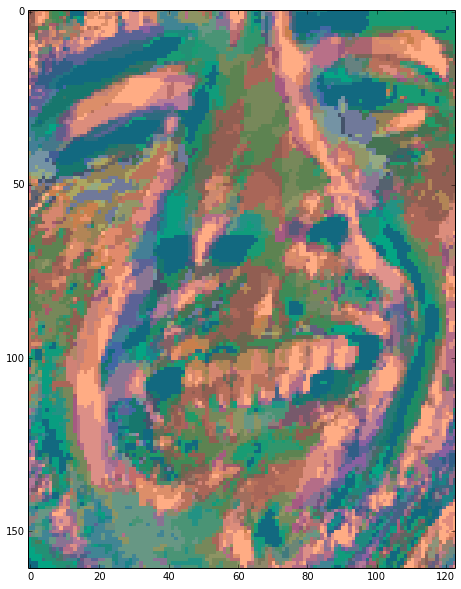

In [20]:
_ = plt.imshow(input_image)

## Cyclic LBP 10 - The first conv layer filters

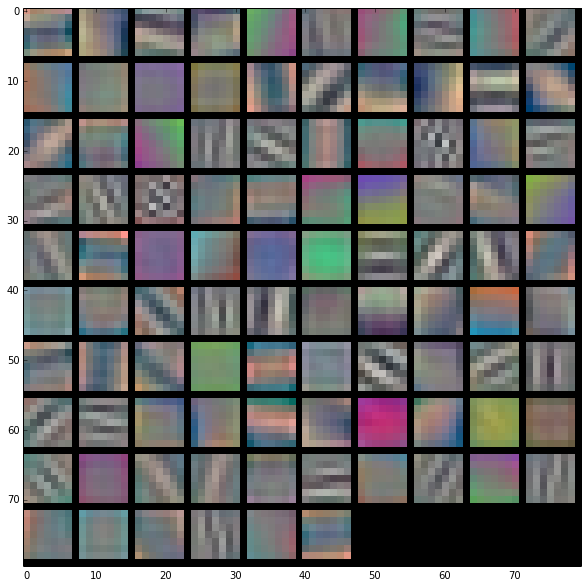

In [21]:
filters = VGG_S_Net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

## Cyclic LBP 10 - The first Conv layer output (rectified responses of the filters above)

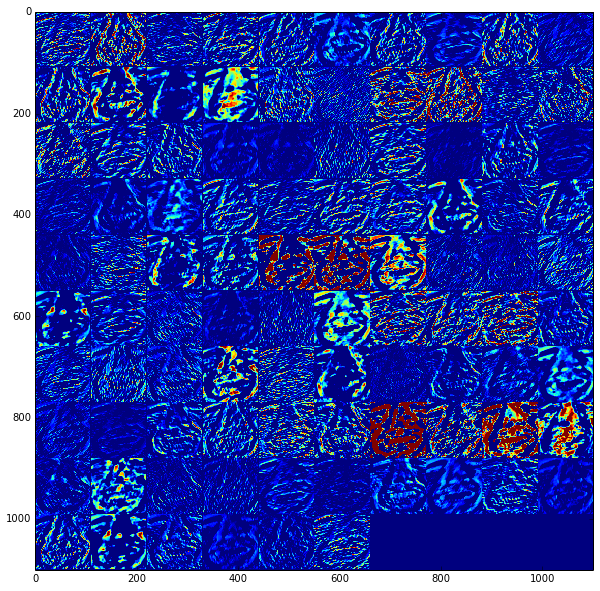

In [22]:
feat = VGG_S_Net.blobs['conv1'].data[0]
vis_square(feat)


Copyright 2015, Gil Levi and Tal Hassner

The SOFTWARE provided in this page is provided "as is", without any guarantee made as to its suitability or fitness for any particular use. It may contain bugs, so use of this tool is at your own risk. We take no responsibility for any damage of any sort that may unintentionally be caused through its use.